In [6]:
# Import Libraries
# ---------------
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score,roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [7]:
# Load dataset
# ------------

df=pd.read_csv('/content/Samsung Mobile Dataset.csv')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Price' from that list so it stays float
if 'Price' in numeric_cols:
    numeric_cols.remove('Price')

# Convert all other numeric columns to Int64 (supports NaN)
for col in numeric_cols:
    df[col] = df[col].astype('Int64')
df

,Name,Price,Build_OS,SIM_Type,CPU_Cores,Display_Type,RAM_GB,Storage_GB,Camera_MP,Battery_mAh,WiFi_Version,Dual_Band,Tri_Band,Hotspot,WiFi_Direct,Accelerometer,Compass,Fingerprint,Barometer,HeartRate
0,SamsungGalaxy Z Fold 6,604999.0,14,Dual SIM,8,Dynamic Amoled,12,512,50,4400,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
1,SamsungGalaxy S24 Ultra 512GB,469999.0,14,Dual SIM,8,Ltpo Amoled,12,512,200,5000,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
2,SamsungGalaxy S25 Ultra,439999.0,15,Dual SIM,8,Ltpo Amoled,12,512,200,5000,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
3,SamsungGalaxy S24 Ultra,434999.0,14,Dual SIM,8,Ltpo Amoled,12,256,200,5000,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
4,SamsungGalaxy Z Fold 5,399999.0,13,Dual SIM,8,Foldable,12,512,50,4400,7,No,Yes,No,Yes,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SamsungGalaxy S26 Edge,239999.0,15,Dual SIM,8,Ltpo Amoled,12,256,200,4000,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
124,SamsungGalaxy S26 Pro,359999.0,15,Dual SIM,8,Ltpo Amoled,12,256,50,5000,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
125,SamsungGalaxy Z Flip 7 FE,NaN,16,Dual SIM,10,Foldable,8,256,50,4000,6,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No
126,SamsungGalaxy G Fold,654999.0,15,Dual SIM,8,Foldable,16,512,50,5700,6,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No


In [8]:
# Information about the structure of dataset
# --------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           128 non-null    object 
 1   Price          106 non-null    float64
 2   Build_OS       121 non-null    Int64  
 3   SIM_Type       122 non-null    object 
 4   CPU_Cores      121 non-null    Int64  
 5   Display_Type   102 non-null    object 
 6   RAM_GB         122 non-null    Int64  
 7   Storage_GB     120 non-null    Int64  
 8   Camera_MP      122 non-null    Int64  
 9   Battery_mAh    122 non-null    Int64  
 10  WiFi_Version   122 non-null    Int64  
 11  Dual_Band      128 non-null    object 
 12  Tri_Band       128 non-null    object 
 13  Hotspot        128 non-null    object 
 14  WiFi_Direct    128 non-null    object 
 15  Accelerometer  128 non-null    object 
 16  Compass        128 non-null    object 
 17  Fingerprint    128 non-null    object 
 18  Barometer 

In [9]:
# Statistical summary of nummerical data from the dataset (categorical data is excluded)
# --------------------------------------------------------------------------------------
df.describe()

,Price,Build_OS,CPU_Cores,RAM_GB,Storage_GB,Camera_MP,Battery_mAh,WiFi_Version
count,106.000000,121.0,121.0,122.0,120.0,122.0,122.0,122.0
mean,150656.584906,12.041322,8.016529,7.344262,204.0,50.393443,4658.032787,5.336066
std,159020.699572,1.976515,0.658071,3.256958,145.969722,37.961171,531.701836,0.777904
min,15999.000000,9.0,4.0,2.0,32.0,8.0,3000.0,4.0
25%,36249.000000,10.0,8.0,4.0,128.0,25.0,4400.0,5.0
50%,74499.000000,12.0,8.0,8.0,128.0,50.0,5000.0,5.0
75%,216249.000000,14.0,8.0,8.0,256.0,50.0,5000.0,6.0
max,654999.000000,16.0,10.0,16.0,512.0,200.0,5700.0,7.0


In [10]:
# Checking datatypes
# -----------------------------
df.dtypes

,0
Name,object
Price,float64
Build_OS,Int64
SIM_Type,object
CPU_Cores,Int64
Display_Type,object
RAM_GB,Int64
Storage_GB,Int64
Camera_MP,Int64
Battery_mAh,Int64


In [11]:
# checking null or missing values
# ----------------------------------
df.isnull().sum()

,0
Name,0
Price,22
Build_OS,7
SIM_Type,6
CPU_Cores,7
Display_Type,26
RAM_GB,6
Storage_GB,8
Camera_MP,6
Battery_mAh,6


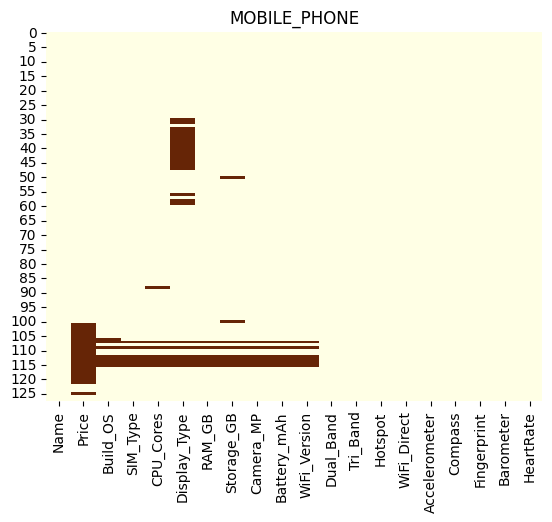

In [12]:
# Heatmap for the visually showing of null-values
# ---------------------------------------------------
sns.heatmap(df.isnull(),cbar = False ,cmap ='YlOrBr')
plt.title('MOBILE_PHONE')
plt.show()

In [34]:
#  Fill missing values
# -----------------------------
for col in df.columns:
    if df[col].isnull().sum() > 0:  # only if there are missing values
        if df[col].dtype == 'object':
            # Categorical → fill with mode
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)

        else:
            # Numeric → fill with mean
            mean_value = df[col].mean()
            df[col] = df[col].astype(float) # Convert to float before filling
            df[col].fillna(mean_value, inplace=True)


In [14]:
#  Verifing again the null values
# --------------------------------
print("\n After cleaning, remaining missing values per column:\n")
print(df.isnull().sum())


 After cleaning, remaining missing values per column:

Name             0
Price            0
Build_OS         0
SIM_Type         0
CPU_Cores        0
Display_Type     0
RAM_GB           0
Storage_GB       0
Camera_MP        0
Battery_mAh      0
WiFi_Version     0
Dual_Band        0
Tri_Band         0
Hotspot          0
WiFi_Direct      0
Accelerometer    0
Compass          0
Fingerprint      0
Barometer        0
HeartRate        0
dtype: int64


In [15]:
#  checking duplicates
# -------------------------------
print("Total duplicate rows:", df.duplicated().sum())


Total duplicate rows: 0


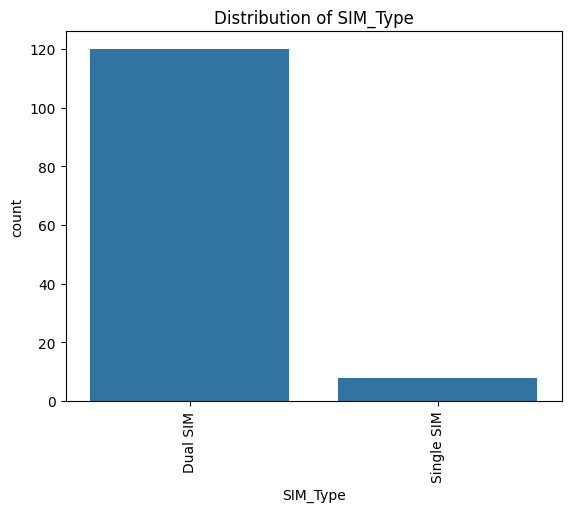

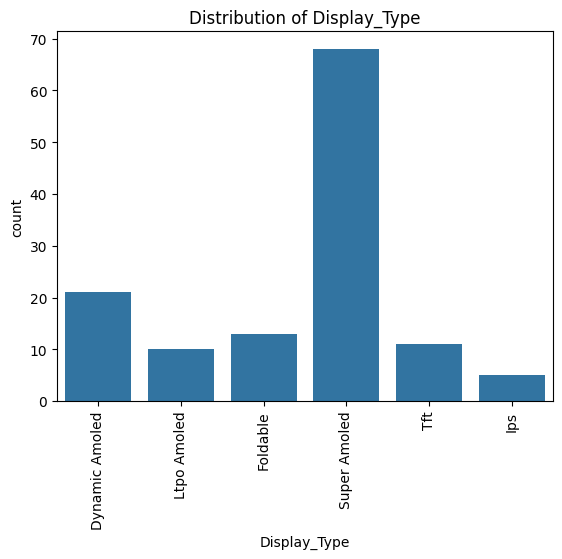

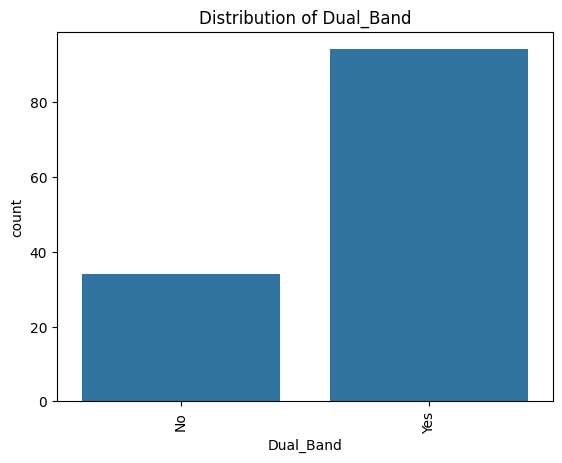

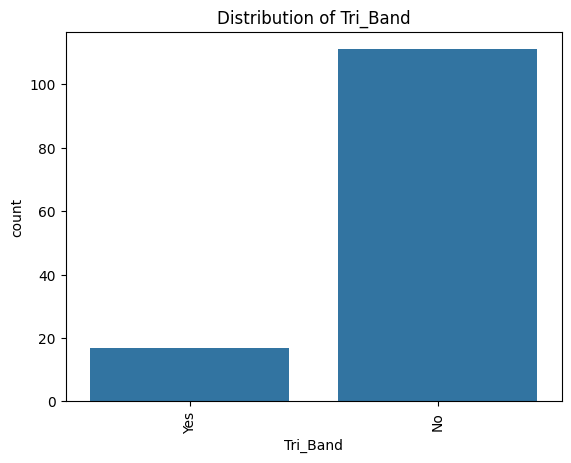

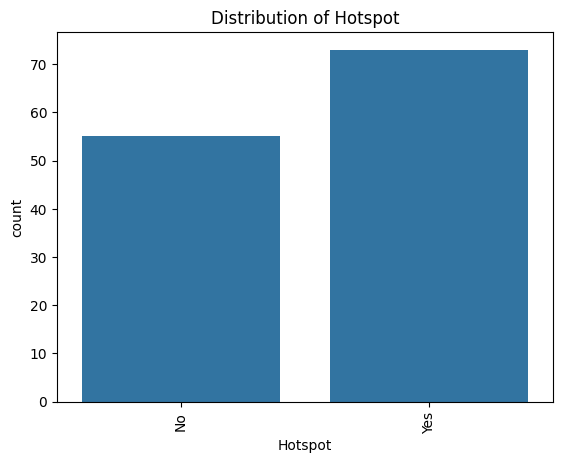

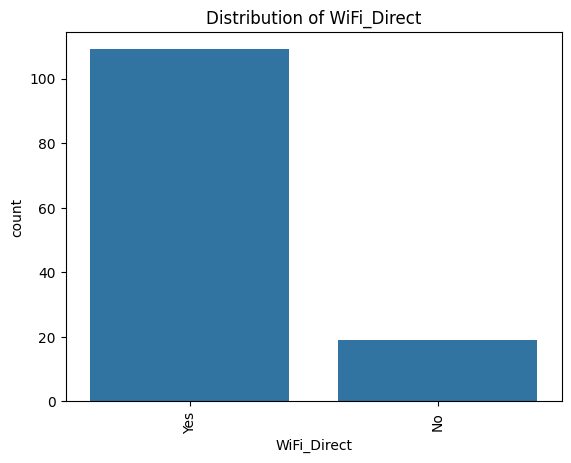

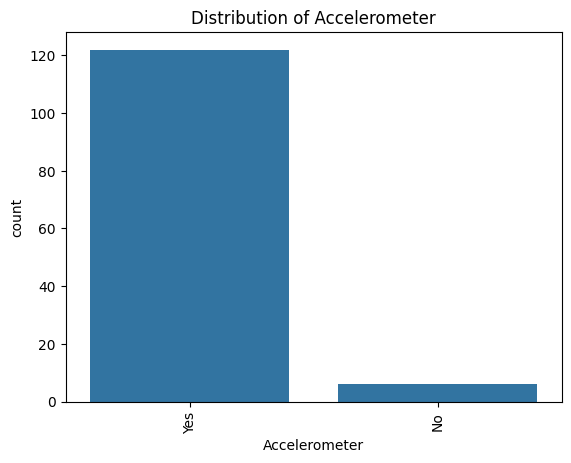

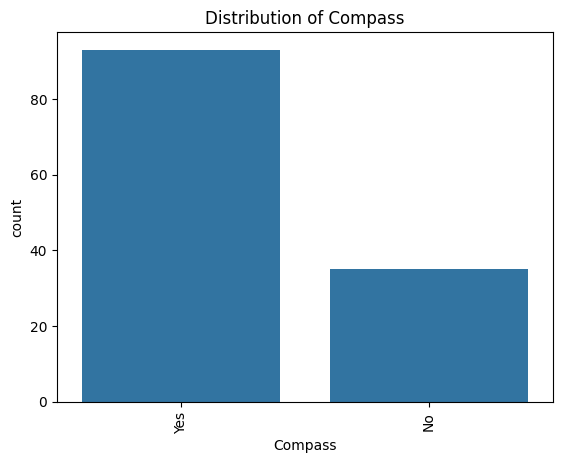

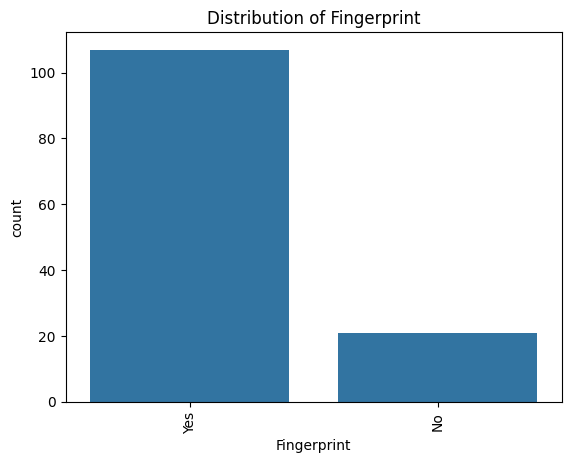

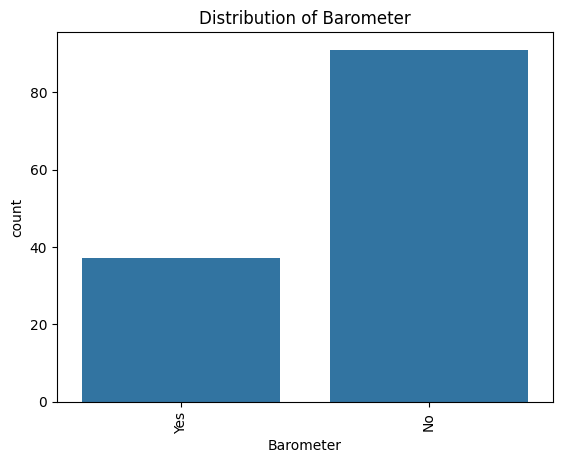

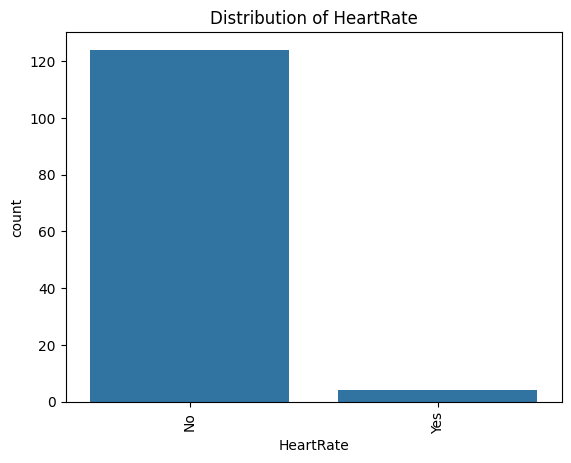

In [16]:
# Bar plot for categorical columns
# ---------------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Name', errors='ignore')
for col in categorical_cols:
  sns.countplot(x=col,data=df)
  plt.xticks(rotation=90)
  plt.title(f'Distribution of {col}')
  plt.show()


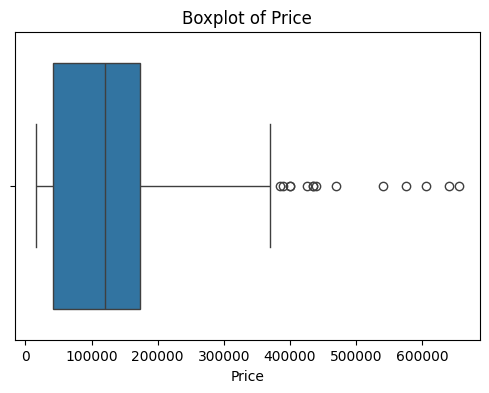

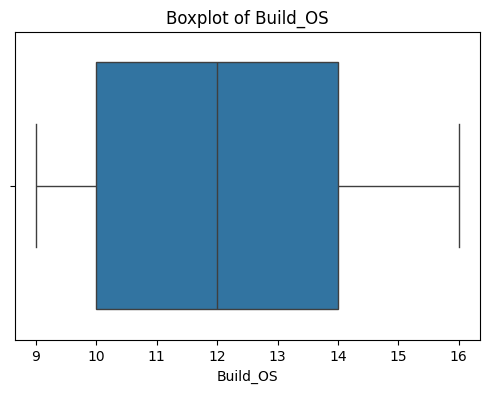

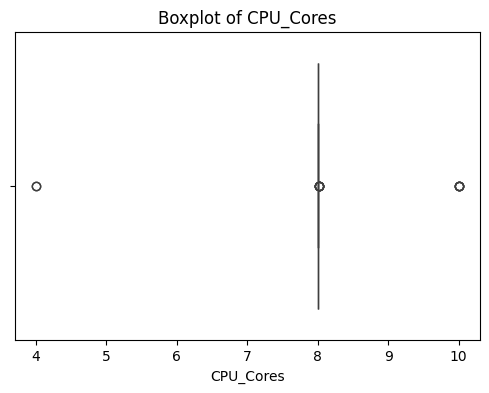

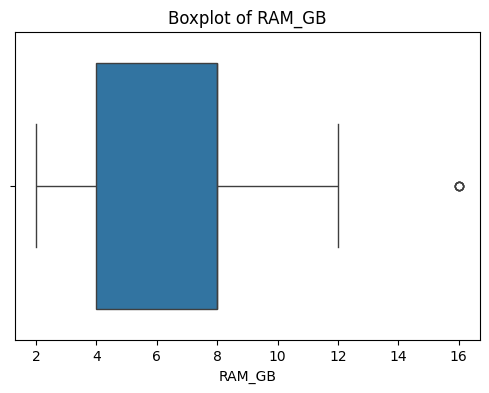

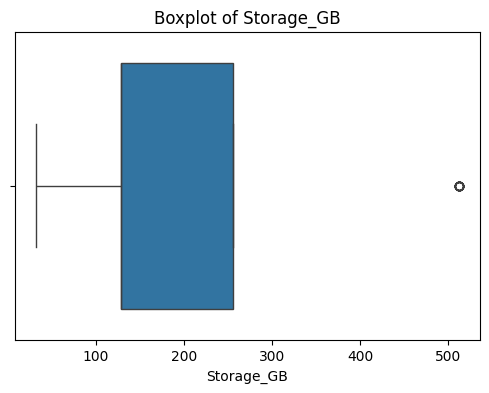

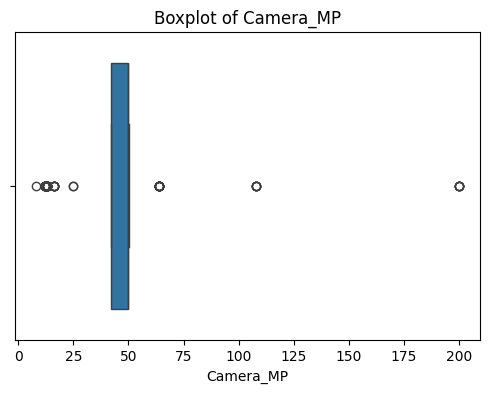

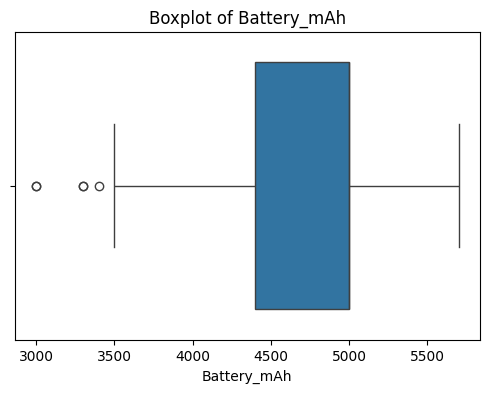

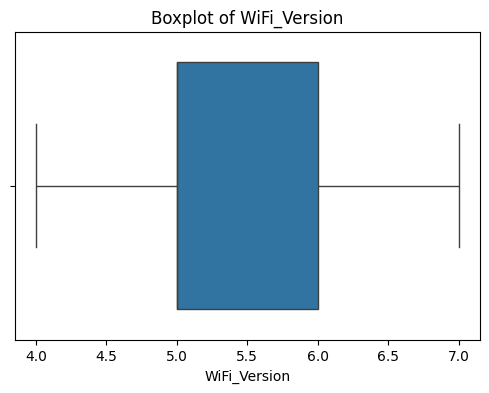

In [17]:
# Boxplot for checking outliers
#--------------------------------
numerical_col=df.select_dtypes(include=['int64','float64']).columns
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [18]:
# Summary Table for All Numeric Columns
#---------------------------------------
summary=[]
numerical_col=df.select_dtypes(include=['int64','float64']).columns

for col in numerical_col:

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR = Q3 - Q1
    median=df[col].median()
    mean=df[col].mean ()
    max_value=df[col].max()
    min_value=df[col].min()
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    outliers= df[(df[col]<lower_bound) | (df[col]>upper_bound)][col]

    summary.append({
        "Column":col,
        "Min" :min_value,
        "Max" :max_value,
        "Q1(25%)" :Q1,
        "Median":median,
        "Q3(75%)": Q3,
        "IQR" :IQR,
        "Mean" :mean,
        "Lower Bound" :lower_bound,
        "Upper Bound" :upper_bound,

        "Outliers Count": outliers.shape[0]
    })
summary_df=pd.DataFrame(summary)
print(summary_df)

         Column      Min       Max   Q1(25%)    Median   Q3(75%)        IQR  \
0         Price  15999.0  654999.0  41199.00  119999.0  173874.0  132675.00   
1      Build_OS      9.0      16.0     10.00      12.0      14.0       4.00   
2     CPU_Cores      4.0      10.0      8.00       8.0       8.0       0.00   
3        RAM_GB      2.0      16.0      4.00       8.0       8.0       4.00   
4    Storage_GB     32.0     512.0    128.00     128.0     256.0     128.00   
5     Camera_MP      8.0     200.0     42.25      50.0      50.0       7.75   
6   Battery_mAh   3000.0    5700.0   4400.00    5000.0    5000.0     600.00   
7  WiFi_Version      4.0       7.0      5.00       5.0       6.0       1.00   

            Mean  Lower Bound  Upper Bound  Outliers Count  
0  150656.584906  -157813.500   372886.500              14  
1      12.041322        4.000       20.000               0  
2       8.016529        8.000        8.000              14  
3       7.344262       -2.000       14.000  

In [19]:
print(df.columns.tolist())

['Name', 'Price', 'Build_OS', 'SIM_Type', 'CPU_Cores', 'Display_Type', 'RAM_GB', 'Storage_GB', 'Camera_MP', 'Battery_mAh', 'WiFi_Version', 'Dual_Band', 'Tri_Band', 'Hotspot', 'WiFi_Direct', 'Accelerometer', 'Compass', 'Fingerprint', 'Barometer', 'HeartRate']


In [20]:
# Encoding
#------------------
# Create encoder
le = LabelEncoder()

# Select only categorical columns, but EXCLUDE 'Name'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'Name']

# Apply label encoding to selected categorical columns only
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Show result
print(df.head())

                            Name     Price  Build_OS  SIM_Type  CPU_Cores  \
0         SamsungGalaxy Z Fold 6  604999.0      14.0         0        8.0   
1  SamsungGalaxy S24 Ultra 512GB  469999.0      14.0         0        8.0   
2        SamsungGalaxy S25 Ultra  439999.0      15.0         0        8.0   
3        SamsungGalaxy S24 Ultra  434999.0      14.0         0        8.0   
4         SamsungGalaxy Z Fold 5  399999.0      13.0         0        8.0   

   Display_Type  RAM_GB  Storage_GB  Camera_MP  Battery_mAh  WiFi_Version  \
0             0    12.0       512.0       50.0       4400.0           7.0   
1             3    12.0       512.0      200.0       5000.0           7.0   
2             3    12.0       512.0      200.0       5000.0           7.0   
3             3    12.0       256.0      200.0       5000.0           7.0   
4             1    12.0       512.0       50.0       4400.0           7.0   

   Dual_Band  Tri_Band  Hotspot  WiFi_Direct  Accelerometer  Compass  \
0 

In [21]:
# Define features (X) and target (y)
#-------------------------------------
# Drop the columns you don't want to use as features
df = df.drop(columns=['Name'], errors='ignore')

x = df.drop(columns=['Price'])
y = df['Price']


In [22]:
x.shape

(128, 18)

In [23]:
y.shape

(128,)

In [24]:
#  Train/test split
#----------------------
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



In [25]:
# Scaling
#----------
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply same transformation on test data
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train.shape

(96, 18)

In [27]:
y_train.shape

(96,)

In [28]:
# Train  LinearRegression model
#-------------------------------
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
#  Predict on the test data
# -------------------------------

y_pred = model.predict(x_test)
y_pred

array([118701.9621467 ,  -2260.92187089,  43840.9470025 ,  43881.6578757 ,
        26852.09975282,  95702.71778736, 274486.51294071, 211130.31210897,
        61253.14112707,  93627.90286753,  57077.06716054,  61927.48654854,
       238362.97646092, 305036.107696  ,  53355.94265856, 150656.58490566,
        84967.44178109,  51953.82116592, 234934.23160101, -39271.33310102,
        72981.63076013, 201220.26233961, 165684.42632947, 178181.35041175,
       128126.79518925,   3711.62820298, 148494.34797763,  75056.44567997,
        55850.99404508, 405087.38153283, 130388.97329109,  18281.9700818 ])

In [30]:
# Evaluation
#------------------
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Linear Regression Results:
R2 Score: 0.7828159349390164
MAE: 39112.55851967985
MSE: 3141862148.271164


In [31]:
# Create and train RandomForestRegressor model
#--------------------------------------------
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

# Predict
y_pred_random_forest = random_forest.predict(x_test)

# Evaluate
print("\n🔹 Random Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_random_forest))
print("MAE:", mean_absolute_error(y_test, y_pred_random_forest))
print("MSE:", mean_squared_error(y_test, y_pred_random_forest))


🔹 Random Forest Results:
R2 Score: 0.7513445983684885
MAE: 38456.367639544034
MSE: 3597137727.99051


Degree 1 MSE: 32.95163067758561
R^2 Score (Test): 0.8988436087355123
Degree 2 MSE: 15.896015182051997
R^2 Score (Test): 0.9512017008494917


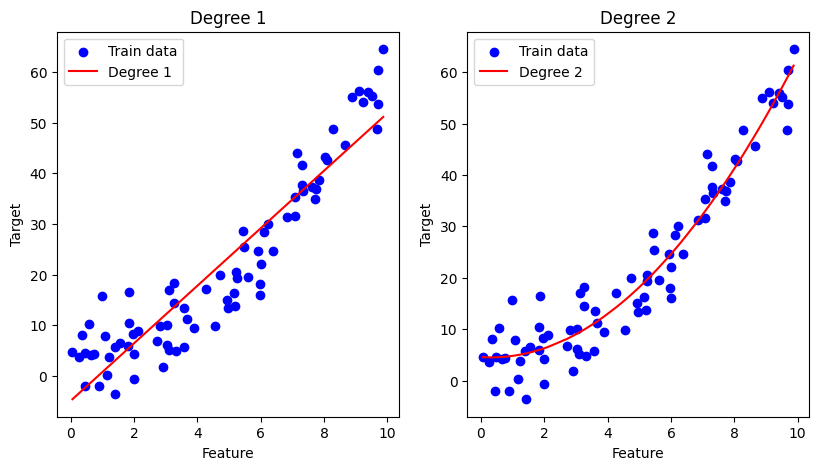

In [32]:
# Create and train polynomial Regression model
#--------------------------------------------
# Create synthetic nonlinear data
np.random.seed(42)
X_poly = np.random.rand(100, 1) * 10
y_poly = 0.5 * X_poly.squeeze()**2 + X_poly.squeeze() + 2 + np.random.randn(100) * 5  # Quadratic with noise

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Sort for plotting
sort_idx = np.argsort(X_train_poly.squeeze())
X_sorted = X_train_poly[sort_idx]
y_sorted = y_train_poly[sort_idx]

# Compare degrees 1, 2
degrees = [1, 2]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_poly.fit(X_train_poly, y_train_poly)

    y_pred_poly = model_poly.predict(X_test_poly)
    error_poly = mean_squared_error(y_test_poly, y_pred_poly)
    print(f"Degree {degree} MSE: {error_poly}")
    print("R^2 Score (Test):", r2_score(y_test_poly, y_pred_poly))

    plt.subplot(1, 3, i)
    plt.scatter(X_train_poly, y_train_poly, color='blue', label='Train data')
    plt.plot(X_sorted, model_poly.predict(X_sorted.reshape(-1, 1)), color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()

plt.show()



In [33]:
import joblib
joblib.dump(model_poly, 'model_poly.pkl')

['model_poly.pkl']

In [35]:
from google.colab import files
files.download('model_poly.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>